In [15]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Matplotlib para un fondo rosado por defecto
plt.style.use('default')  # Este ajuste es opcional

# Definir la función para graficar con fondo rosado
def graficar_con_fondo_rosado(y_real, y_pred, titulo):
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('#FFB6C1')  # Establecer el fondo a color rosado

    # Graficar los valores reales
    plt.plot(y_real, label='Valores reales', color='blue', marker='o')

    # Graficar las predicciones
    plt.plot(y_pred, label='Predicciones', color='red', linestyle='--', marker='x')

    # Configuración del gráfico
    plt.title(titulo)
    plt.xlabel('Patrones')
    plt.ylabel('Clases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos

    # Mostrar el gráfico
    plt.show()


In [2]:
# Función para entrenar el modelo de regresión lineal simple
def entrenar_modelo_simple(X1_train, Y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normaliza los datos de X1
        ('regression', LinearRegression())
    ])
    pipeline.fit(X1_train, Y_train)
    return pipeline

# Función para entrenar el modelo de regresión lineal múltiple
def entrenar_modelo_multiple(X_train, Y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normaliza los datos de X1 y X2
        ('regression', LinearRegression())
    ])
    pipeline.fit(X_train, Y_train)
    return pipeline

# Función para evaluar el modelo y calcular MSE, MAE y R²
def evaluar_modelo(modelo, X_test, Y_test):
    predicciones = modelo.predict(X_test)
    mse = mean_squared_error(Y_test, predicciones)
    mae = mean_absolute_error(Y_test, predicciones)
    r2 = r2_score(Y_test, predicciones)
    return mse, mae, r2, predicciones

# Función para realizar validación cruzada
def cross_validar_modelo(modelo, X_train, Y_train):
    scores = cross_val_score(modelo, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    return np.mean(-scores)  # Retorna el MSE promedio de las 5 divisiones

# Función para optimizar el modelo usando GridSearchCV
def optimizar_modelo(X_train, Y_train):
    param_grid = {
        'regression__fit_intercept': [True, False],
        'regression__normalize': [True, False]
    }
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normaliza los datos
        ('regression', LinearRegression())
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, Y_train)
    return grid_search.best_estimator_

# Función para graficar el modelo simple
def graficar_modelo_simple(X1_train, Y_train, modelo):
    plt.figure(figsize=(10, 6))
    plt.scatter(X1_train, Y_train, color='blue', label='Datos reales')
    plt.plot(X1_train, modelo.predict(X1_train), color='red', label='Modelo Simple')
    plt.xlabel('X1')
    plt.ylabel('Y')
    plt.title('Regresión Lineal Simple')
    plt.legend()
    plt.grid(True)
    plt.show()

# Función para graficar las predicciones frente a los valores reales
def graficar_predicciones_vs_reales(Y_test, predicciones, modelo_nombre):
    plt.figure(figsize=(10, 6))
    plt.plot(Y_test, label='Valores reales', color='blue')
    plt.plot(predicciones, label=f'Predicciones {modelo_nombre}', color='red', linestyle='--')
    plt.xlabel('Índice')
    plt.ylabel('Y')
    plt.title(f'Comparación de {modelo_nombre}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Datos de entrenamiento (según las tablas del enunciado)
Y_train = np.array([140, 150, 130, 120, 125, 135, 100, 150, 150, 110])
X1_train = np.array([6.5, 8.5, 7.5, 6, 6.2, 8, 5, 10, 9.5, 5.5]).reshape(-1, 1)
X_train = np.array([
    [6.5, 18], [8.5, 20], [7.5, 10], [6, 15], [6.2, 15],
    [8, 18], [5, 8], [10, 25], [9.5, 25], [5.5, 10]
])

In [4]:
# Entrenamiento del modelo simple y múltiple
modelo_simple = entrenar_modelo_simple(X1_train, Y_train)
modelo_multiple = entrenar_modelo_multiple(X_train, Y_train)

In [5]:
# Datos de test (según las tablas del enunciado)
X1_test = np.array([4.5, 5, 7.2, 10, 10, 6.5, 5, 8, 7.5, 6]).reshape(-1, 1)
Y_test = np.array([90, 100, 130, 145, 170, 125, 95, 135, 135, 115])
X_test = np.array([
    [4.5, 8], [5, 15], [7.2, 18], [10, 20], [10, 25],
    [6.5, 18], [5, 10], [8, 20], [7.5, 25], [6, 10]
])

# Evaluar el modelo simple con los datos de test
mse_simple, mae_simple, r2_simple, predicciones_simple = evaluar_modelo(modelo_simple, X1_test, Y_test)

# Evaluar el modelo múltiple con los datos de test
mse_multiple, mae_multiple, r2_multiple, predicciones_multiple = evaluar_modelo(modelo_multiple, X_test, Y_test)

# Mostrar los resultados de la evaluación
print(f"Modelo Simple: MSE = {mse_simple}, MAE = {mae_simple}, R² = {r2_simple}")
print(f"Modelo Múltiple: MSE = {mse_multiple}, MAE = {mae_multiple}, R² = {r2_multiple}")


Modelo Simple: MSE = 91.35318038904443, MAE = 7.592943694812886, R² = 0.8336007643186805
Modelo Múltiple: MSE = 111.22130359825356, MAE = 8.790635664244308, R² = 0.7974111045569152


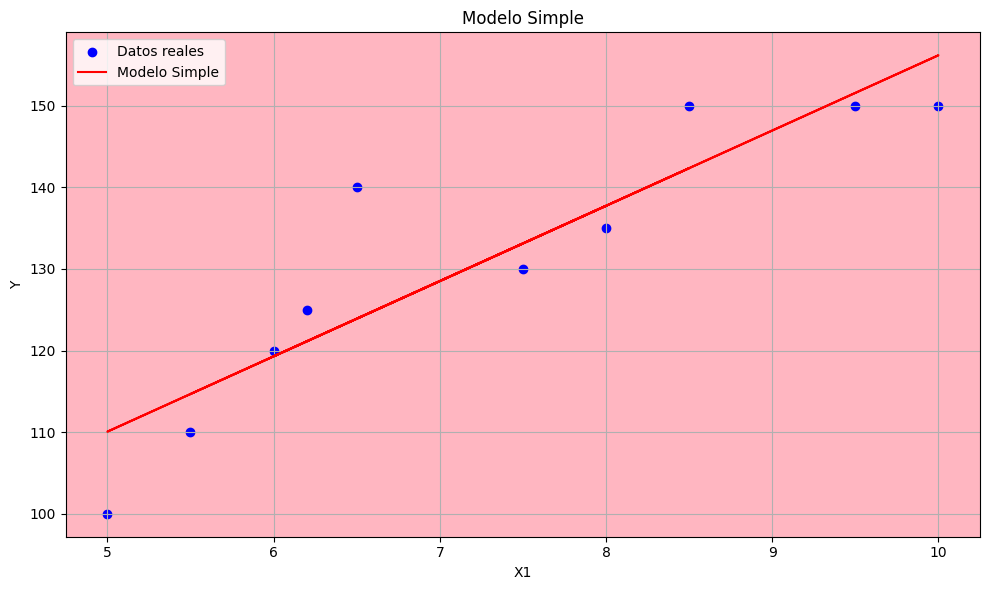

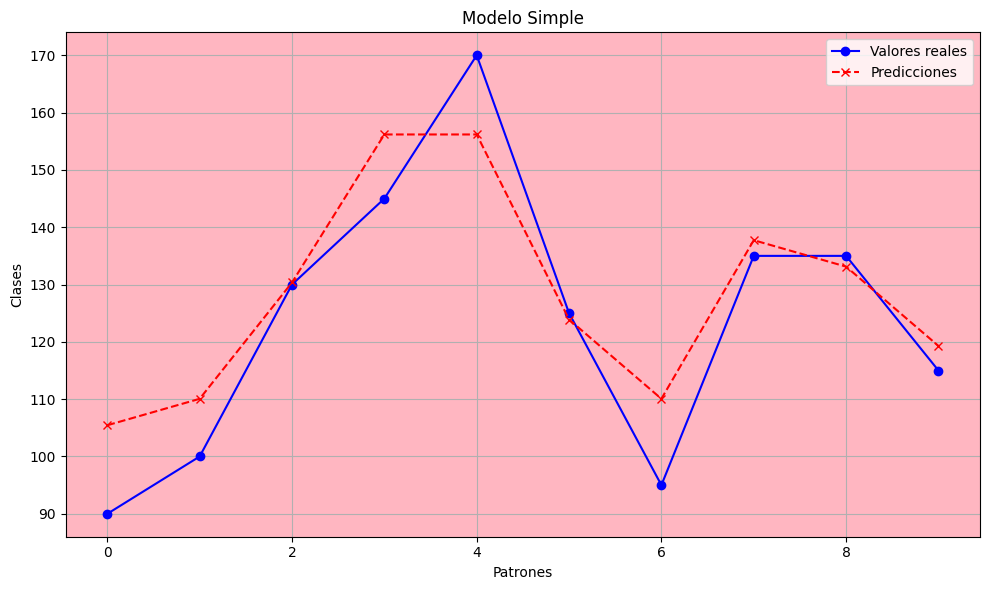

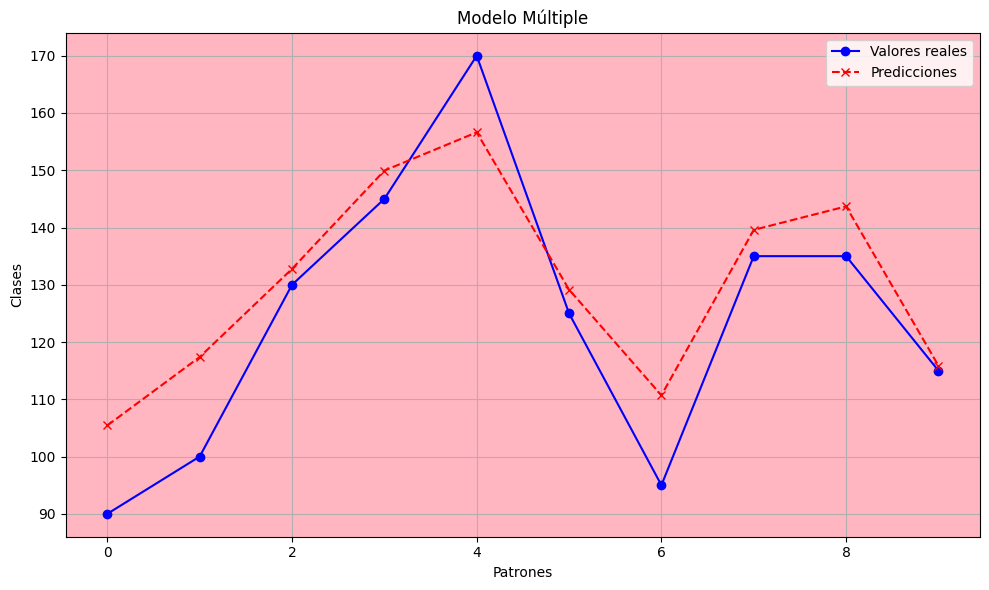

In [17]:
# Graficar el modelo simple (Si hay una función específica para esto, actualízala para incluir fondo rosado)
# Si no tienes una función, puedes usar la siguiente línea:
# plt.gca().set_facecolor('#FFB6C1')  # Establecer fondo rosado
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#FFB6C1')  # Establecer fondo rosado

# Graficar los puntos de datos del modelo simple
plt.scatter(X1_train, Y_train, color='blue', label='Datos reales')
plt.plot(X1_train, modelo_simple.predict(X1_train), color='red', label='Modelo Simple')
plt.title('Modelo Simple')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar predicciones vs valores reales para el modelo simple
graficar_con_fondo_rosado(Y_test, predicciones_simple, "Modelo Simple")

# Graficar predicciones vs valores reales para el modelo múltiple
graficar_con_fondo_rosado(Y_test, predicciones_multiple, "Modelo Múltiple")



In [9]:
# Optimización del modelo múltiple usando GridSearchCV
def optimizar_modelo(X_train, Y_train):
    """
    Optimiza los hiperparámetros del modelo usando GridSearchCV.
    
    Retorna:
    best_model: mejor estimador obtenido por GridSearchCV
    """
    # Eliminamos el parámetro `normalize` ya que es innecesario con StandardScaler
    param_grid = {
        'regression__fit_intercept': [True, False],  # Solo ajustamos `fit_intercept`
        'regression__copy_X': [True, False],  # Ajustamos `copy_X` para probar su efecto
        'regression__positive': [True, False]  # Si los coeficientes deben ser positivos
    }

    # Creamos el pipeline con StandardScaler y LinearRegression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalización
        ('regression', LinearRegression())  # Regresión Lineal
    ])

    # GridSearchCV para encontrar los mejores parámetros
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, Y_train)
    
    return grid_search.best_estimator_

# Ejecutar la optimización
mejor_modelo_multiple = optimizar_modelo(X_train, Y_train)
print("Mejor estimador (Modelo Múltiple):", mejor_modelo_multiple)


Mejor estimador (Modelo Múltiple): Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression(positive=True))])


In [10]:
# Evaluar el mejor modelo optimizado con los datos de test
mse_optimizado, mae_optimizado, r2_optimizado, predicciones_optimizado = evaluar_modelo(mejor_modelo_multiple, X_test, Y_test)

# Mostrar los resultados de la evaluación del modelo optimizado
print(f"Modelo Optimizado: MSE = {mse_optimizado}, MAE = {mae_optimizado}, R² = {r2_optimizado}")

Modelo Optimizado: MSE = 111.22130359825367, MAE = 8.79063566424431, R² = 0.797411104556915


In [11]:
# Evaluar el modelo múltiple original con los datos de test
mse_multiple, mae_multiple, r2_multiple, predicciones_multiple = evaluar_modelo(modelo_multiple, X_test, Y_test)

# Mostrar los resultados de la evaluación del modelo múltiple original
print(f"Modelo Original Múltiple: MSE = {mse_multiple}, MAE = {mae_multiple}, R² = {r2_multiple}")

# Comparación de los dos modelos
print("\nComparación del Modelo Optimizado vs Modelo Original:")
print(f"Modelo Original Múltiple -> MSE: {mse_multiple}, MAE: {mae_multiple}, R²: {r2_multiple}")
print(f"Modelo Optimizado -> MSE: {mse_optimizado}, MAE: {mae_optimizado}, R²: {r2_optimizado}")

Modelo Original Múltiple: MSE = 111.22130359825356, MAE = 8.790635664244308, R² = 0.7974111045569152

Comparación del Modelo Optimizado vs Modelo Original:
Modelo Original Múltiple -> MSE: 111.22130359825356, MAE: 8.790635664244308, R²: 0.7974111045569152
Modelo Optimizado -> MSE: 111.22130359825367, MAE: 8.79063566424431, R²: 0.797411104556915


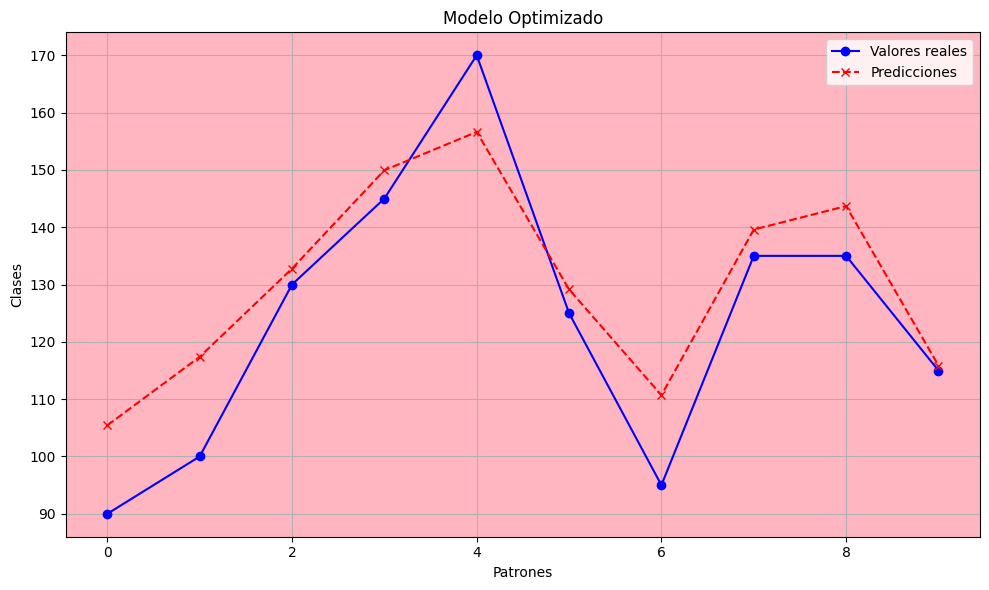

In [18]:
# Graficar predicciones vs valores reales del mejor modelo optimizado
graficar_con_fondo_rosado(Y_test, predicciones_optimizado, "Modelo Optimizado")

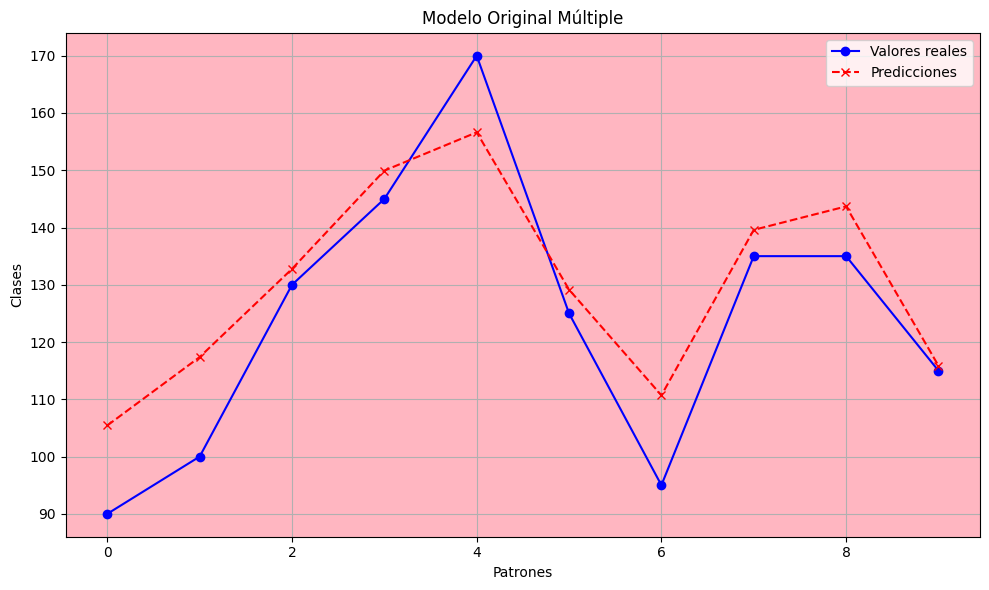

In [19]:
# Graficar predicciones vs valores reales del modelo original múltiple
graficar_con_fondo_rosado(Y_test, predicciones_multiple, "Modelo Original Múltiple")